<a href="https://colab.research.google.com/github/kkb0318/benkyokai/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install

In [73]:
!pip install xgboost
!pip install dtreeviz

## titanic dataset

In [74]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt

# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')




<table>
  <tr>
    <th>Feature Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>sex</td>
    <td>Gender of passenger</td>
  </tr>
  <tr>
    <td>age</td>
    <td>Age of passenger</td>
  </tr>
    <tr>
    <td>n_siblings_spouses</td>
    <td>siblings and partners aboard</td>
  </tr>
    <tr>
    <td>parch</td>
    <td>of parents and children aboard</td>
  </tr>
    <tr>
    <td>fare</td>
    <td>Fare passenger paid.</td>
  </tr>
    <tr>
    <td>class</td>
    <td>Passenger's class on ship</td>
  </tr>
    <tr>
    <td>deck</td>
    <td>Which deck passenger was on</td>
  </tr>
    <tr>
    <td>embark_town</td>
    <td>Which town passenger embarked from</td>
  </tr>
    <tr>
    <td>alone</td>
    <td>If passenger was alone</td>
  </tr>
</table>

In [75]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


## Train and evaluate the model

### Preprocessing

In [76]:
import numpy as np
import pandas as pd
import xgboost as xgb

In [77]:
def make_input_fn(X):
  #print(X.isnull().sum())
  X = X.dropna()
  X["sex"] = X["sex"].map({"male":0,"female":1})
  X["alone"] = X["alone"].map({"n":0,"y":1})
  X = pd.get_dummies(X, columns=['embark_town'])
  X = pd.get_dummies(X, columns=['class'])
  X = pd.get_dummies(X, columns=['deck'])
  return X

In [78]:
x_train = make_input_fn(dftrain)
x_eval = make_input_fn(dfeval)

In [79]:
# 足りない列を追加
x_eval[x_train.columns.difference(x_eval.columns)]=0

### Training

In [129]:
np_x_train = x_train.values
np_x_eval = x_eval.values

model = xgb.XGBClassifier(max_depth = 10,
                           learning_rate = 0.16,
                           subsample=1,
                           n_estimators = 200)
model.fit(np_x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.16, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [130]:
predicted = model.predict(np_x_eval)

### evaluation

In [131]:
from sklearn.metrics import confusion_matrix, precision_score
print(confusion_matrix(y_eval,predicted))
print(precision_score(y_eval,predicted))

[[138  27]
 [ 22  77]]
0.7403846153846154


## Visualization

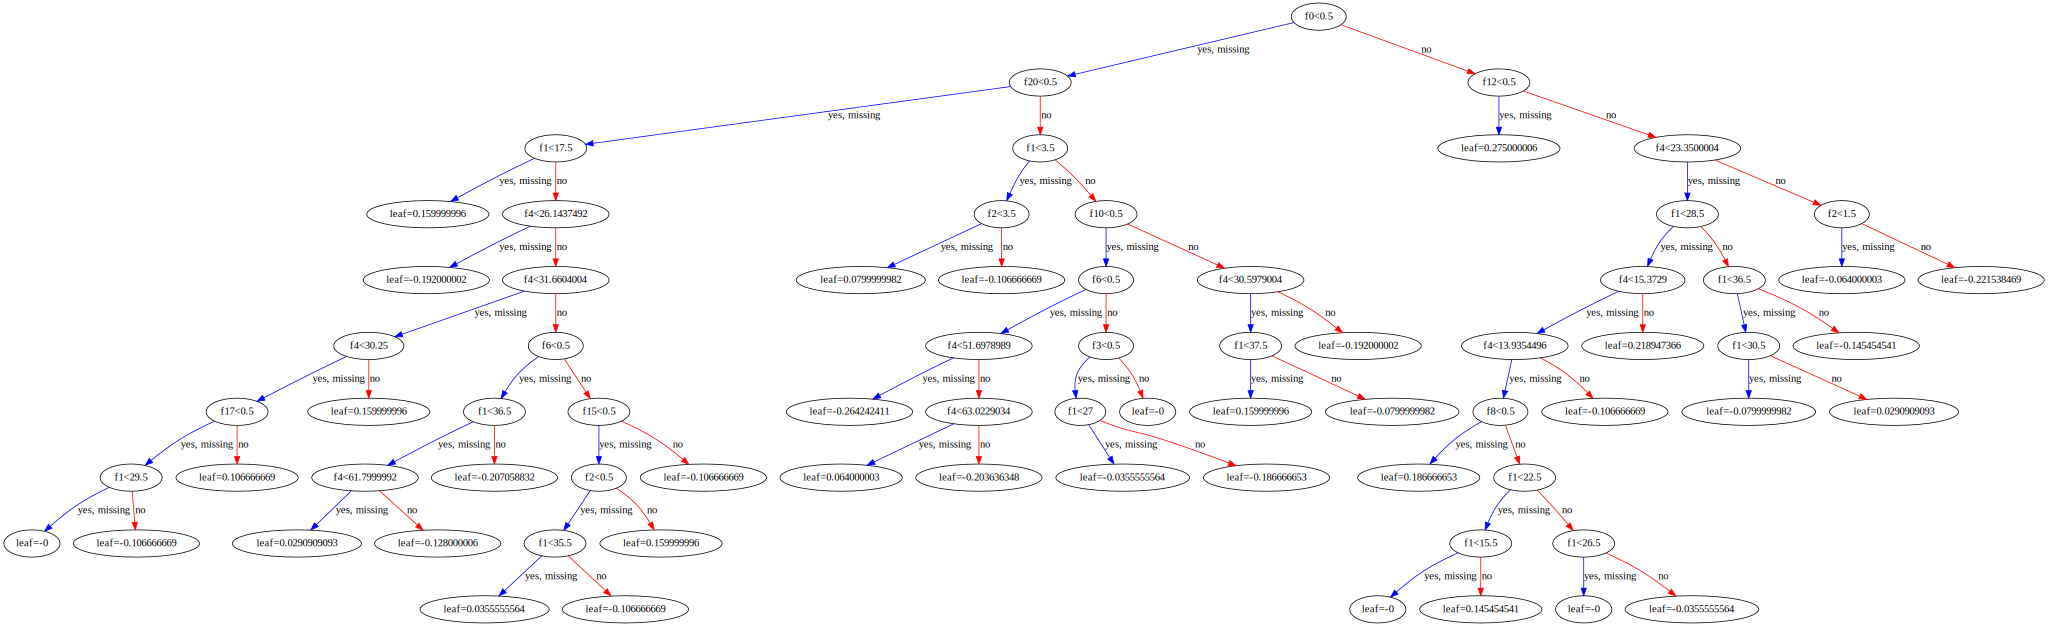

In [132]:
xgb.to_graphviz(model)